In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

In [136]:
run comb_tables.py

/home/karen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


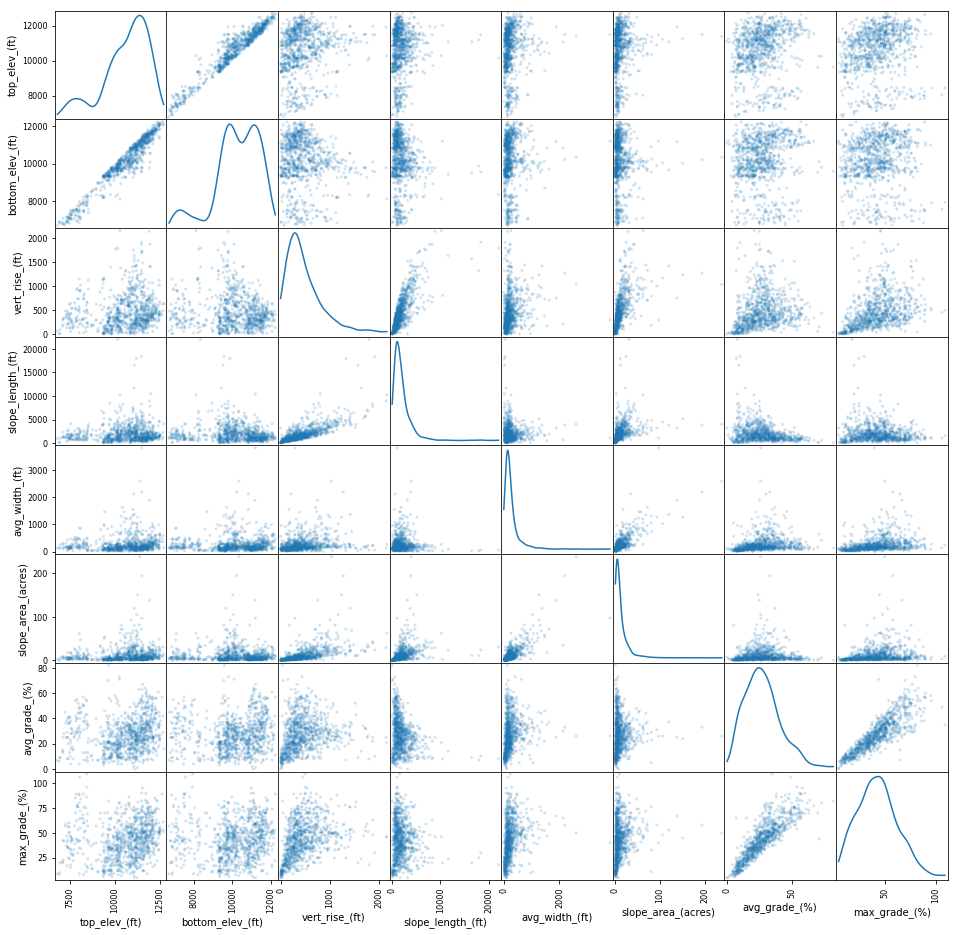

In [23]:
pd.scatter_matrix(whole_table, alpha=0.2, figsize=(16, 16), diagonal='kde');

In [137]:
whole_table.head()

,trail_name,top_elev_(ft),bottom_elev_(ft),vert_rise_(ft),slope_length_(ft),avg_width_(ft),slope_area_(acres),avg_grade_(%),max_grade_(%),ability_level,resort,location
0,Over the Rainbow,11924.0,10858.0,1066.0,2404.0,319.0,17.6,50.0,69.0,Expert,Loveland,CO
1,Zoom,11405.0,11005.0,400.0,839.0,195.0,3.7,55.0,66.0,Expert,Loveland,CO
2,Avalanche Bowl,11840.0,11405.0,435.0,1141.0,255.0,6.7,42.0,76.0,Expert,Loveland,CO
3,Tiger's Tail,11856.0,11469.0,386.0,1183.0,136.0,3.7,35.0,61.0,Expert,Loveland,CO
4,Spillway,11849.0,11631.0,218.0,702.0,198.0,3.2,33.0,41.0,Intermediate,Loveland,CO


Making a list of the useable X columns

In [138]:
X_lst = [column for column in list(whole_table.columns) if whole_table[column].dtype == 'float64']

In [139]:
X_df = whole_table[X_lst]

In [140]:
whole_table['ability_level'][whole_table['ability_level'] == 'Advanced Intermediate'] = 'Adv. Intermediate'

/home/karen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [167]:
whole_table['ability_level'].unique()

array(['Expert', 'Intermediate', 'Adv. Intermediate', 'Low Intermediate',
       'Novice', 'Beginner', 'Glade', 'Exp Bowl', 'Hike To'], dtype=object)

Making a 'target' column since Ability level seems to be too vague...

In [178]:
whole_table['target'][whole_table['ability_level'].isin(['Novice', 'Beginner'])] = 'Green'
whole_table['target'][whole_table['ability_level'].isin(['Low Intermediate', 'Intermediate'])] = 'Blue'
whole_table['target'][whole_table['ability_level'].isin(['Adv. Intermediate', 'Expert','Hike To'])] = 'Black'
whole_table['target'][whole_table['ability_level'] == 'Exp Bowl'] = 'Black'

/home/karen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/karen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/karen/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports unti

In [143]:
loveland = whole_table[whole_table['resort'] == 'Loveland']

Taking out the Glades, since they're only in Vail, and I'm not sure what "level" they are

In [170]:
whole_table_no_glades = whole_table[whole_table['ability_level'] != 'Glade']

In [171]:
whole_table_no_glades.shape

(880, 13)

Making y and X (pre-no_glades)

In [72]:
y = whole_table['ability_level'].values

In [30]:
X = X_df.values

Checking the multicollinearity - top_elev and bottom_elev seem to be an issue

In [28]:
for i in range(X.shape[1]):
    print(variance_inflation_factor(X,i))

233265.952237
213848.234795
691.041136178
8.06972222447
6.54849111627
6.79100741026
24.4416174979
29.5730953154


Dropping the columns that seem to be most correlated (and unimportant...)

In [54]:
X_dropped = X_df.drop(['top_elev_(ft)','bottom_elev_(ft)','vert_rise_(ft)'],axis=1)
X_dropped.head()

,slope_length_(ft),avg_width_(ft),slope_area_(acres),avg_grade_(%),max_grade_(%)
0,2404.0,319.0,17.6,50.0,69.0
1,839.0,195.0,3.7,55.0,66.0
2,1141.0,255.0,6.7,42.0,76.0
3,1183.0,136.0,3.7,35.0,61.0
4,702.0,198.0,3.2,33.0,41.0


In [55]:
X_dropped_mat = X_dropped.values

In [56]:
for i in range(X_dropped_mat.shape[1]):
    print(variance_inflation_factor(X_dropped_mat,i))

2.41116055714
5.55255379584
5.08296487969
22.6648118325
26.3148731492


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

Splitting the data and testing on y being the ability level - not a very good accuracy...

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_dropped_mat,y,test_size=.33,random_state=42)

In [74]:
logmod = LogisticRegression()

In [75]:
logmod.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
logmod.score(X_test,y_test)

0.47999999999999998

In [77]:
y_pred = logmod.predict(X_test)

Setting y as 'target' and using no_glades - much better accuracy...

In [172]:
y_no_glades = whole_table_no_glades['target'].values

In [175]:
X_no_glades = whole_table_no_glades[[column for column in list(whole_table_no_glades.columns) if whole_table_no_glades[column].dtype == 'float64']].drop(['top_elev_(ft)','bottom_elev_(ft)','vert_rise_(ft)'],axis=1).values

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X_no_glades,y_no_glades,test_size=.33,random_state=42)

In [177]:
logmod.fit(X_train,y_train)
logmod.score(X_test,y_test)

0.7903780068728522

In [189]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier

In [184]:
dtc = DecisionTreeClassifier()
dtc.fit (X_train,y_train)
dtc.score(X_test,y_test)

0.83161512027491413

In [185]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.57388316151202745

In [186]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc.score(X_test,y_test)

0.85910652920962194

In [188]:
sgd = SGDClassifier()
sgd.fit(X_train,y_train)
sgd.score(X_test,y_test)

/home/karen/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.47766323024054985

In [195]:
ada = AdaBoostClassifier()
ada.fit(X_train,y_train)
ada.score(X_test,y_test)

0.48797250859106528

In [194]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc.score(X_test,y_test)

0.89003436426116833

In [196]:
y_pred = gbc.predict(X_test)